### Sustainability Aware Asset Management: **Groupe A: North America // Scope 1 + 2**
#### **Part I - Standard Asset Allocation**

In [1]:
## Packages lists:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1.3)
import datetime as dt
from scipy.optimize import minimize

## Importing all the dataframes from data.ipynb
%run data.ipynb

In [2]:
## Converting into returns using the simple return definition. Also replacing the NaN in the first period by 0.
df_m = monthly_return.pct_change().fillna(0)
df_m.index = pd.to_datetime(df_m.index)

df_y = yearly_return.pct_change().fillna(0)

In [3]:
## DataFrame monthly returns
df_m

,SCHLUMBERGER,ARCH CAP.GP.,EVEREST GROUP,NABORS INDUSTRIES,RENAISSANCERE HDG.,SIGNET JEWELERS,WHITE MOUNTAINS IN.GP.,ARC RESOURCES,AGNICO-EAGLE MNS. (NYS),ALIMENTATION COUCHE TARD,...,WHIRLPOOL,JOHN WILEY AND SONS A,WILLIAMS,WILLIAMS-SONOMA,WOLFSPEED,XCEL ENERGY,XEROX HOLDINGS,YUM! BRANDS,ZEBRA TECHNOLOGIES 'A',ZIONS BANCORP.
2000-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-02-29,0.213043,0.042720,-0.024785,0.210970,-0.024188,-0.123221,-0.020000,-0.018121,0.090446,-0.054018,...,-0.061660,-0.050000,0.072112,-0.023672,0.996015,-0.087661,0.041931,-0.069851,0.124601,-0.102536
2000-03-31,0.035756,0.073857,0.331254,0.081883,0.083020,0.065703,0.220886,0.028631,-0.205356,0.017976,...,0.079406,0.265912,0.054242,0.002025,-0.399201,0.131676,0.206472,0.166608,-0.248818,-0.215549
2000-04-30,0.000814,-0.060083,-0.103420,0.016102,-0.098173,0.081647,0.036805,0.035981,-0.033699,0.051096,...,0.110870,-0.041666,-0.146517,0.116935,0.289036,0.116712,0.019246,0.090519,0.139995,-0.003003
2000-05-31,-0.039184,-0.025404,0.162378,0.090333,0.182463,-0.159331,0.015288,0.113836,0.000000,-0.077749,...,-0.125011,0.032612,0.108336,-0.074007,-0.165056,0.014328,0.031131,-0.134621,-0.157894,0.128942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.030245,0.029732,0.035688,-0.070060,0.047045,0.073471,0.105348,-0.012323,-0.032102,-0.034755,...,-0.084695,-0.118537,-0.001761,0.029982,0.362185,0.014621,-0.029797,-0.087602,-0.156699,0.015849
2022-09-30,-0.054569,-0.003940,-0.024565,-0.234397,0.038844,-0.124082,-0.048891,-0.121537,0.024753,-0.059167,...,-0.139144,-0.184010,-0.147509,-0.207731,-0.089099,-0.132467,-0.198372,-0.044050,-0.131382,-0.075776
2022-10-31,0.449301,0.262631,0.229460,0.715424,0.102727,0.141973,0.086822,0.164593,0.040966,0.104964,...,0.025442,0.133773,0.143205,0.057963,-0.238100,0.017344,0.118497,0.112001,0.080950,0.021235
2022-11-30,-0.009225,0.041913,0.052637,-0.090213,0.222146,-0.002608,-0.040455,0.048126,0.154912,0.013089,...,0.072518,0.123726,0.060191,-0.055964,0.154539,0.078482,0.114834,0.092958,-0.045688,0.005918


In [4]:
## DataFrame yearly returns
df_y

,SCHLUMBERGER,ARCH CAP.GP.,EVEREST GROUP,NABORS INDUSTRIES,RENAISSANCERE HDG.,SIGNET JEWELERS,WHITE MOUNTAINS IN.GP.,ARC RESOURCES,AGNICO-EAGLE MNS. (NYS),ALIMENTATION COUCHE TARD,...,WHIRLPOOL,JOHN WILEY AND SONS A,WILLIAMS,WILLIAMS-SONOMA,WOLFSPEED,XCEL ENERGY,XEROX HOLDINGS,YUM! BRANDS,ZEBRA TECHNOLOGIES 'A',ZIONS BANCORP.
1999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000,0.438938,0.188184,2.230862,0.911922,0.978139,-0.280871,1.669779,0.535816,-0.191025,0.020209,...,-0.245418,0.293421,0.325503,-0.565217,-0.167643,0.584829,-0.788674,-0.145666,-0.302620,0.073984
2001,-0.303476,0.716674,-0.008792,-0.419611,0.243833,0.860416,0.090904,0.226762,0.650180,0.929680,...,0.572687,0.080064,-0.289743,1.145000,-0.170870,0.005747,1.271530,0.490935,0.360643,-0.145427
2002,-0.221917,0.210431,-0.213694,0.027383,0.264452,-0.183182,-0.069064,0.127979,0.508185,0.440221,...,-0.272551,0.051227,-0.890114,0.265734,-0.445009,-0.571981,-0.227479,-0.015437,0.032252,-0.239372
2003,0.321163,0.278838,0.537984,0.176638,0.255900,0.757192,0.428426,0.743506,-0.185941,0.608581,...,0.423810,0.094681,2.659272,0.280661,0.081958,0.616905,0.714257,0.420325,0.737415,0.589503
2004,0.238426,-0.029108,0.063954,0.235904,0.077126,0.185423,0.407452,0.465934,0.141677,0.518584,...,-0.021776,0.350603,0.668947,0.007765,1.265679,0.122337,0.232639,0.378345,0.271968,0.132813
2005,0.466214,0.414727,0.125760,0.476896,-0.138178,-0.115733,-0.124412,0.668013,0.440142,0.365052,...,0.240447,0.130511,0.439698,0.231451,-0.370260,0.061957,-0.138730,0.002288,-0.238634,0.133353
2006,0.310661,0.234853,-0.016189,-0.213729,0.383671,0.297798,0.052764,-0.075279,1.089488,0.117869,...,0.011135,-0.003945,0.144098,-0.265272,-0.313785,0.305274,0.157009,0.267604,-0.188090,0.111197
2007,0.570955,0.040546,0.042689,-0.080256,0.019602,-0.380628,-0.099837,0.207074,0.329067,-0.177190,...,0.001673,0.124575,0.386993,-0.165082,0.586027,0.019486,-0.042329,0.322776,-0.002588,-0.420271
2008,-0.564582,-0.003564,-0.223302,-0.562979,-0.128068,-0.665808,-0.475888,-0.121665,-0.058103,-0.367262,...,-0.479364,-0.158553,-0.588482,-0.688299,-0.422281,-0.137587,-0.500176,-0.159869,-0.416143,-0.454314


### Part I - Standard Asset Allocation

#### 1.1 - Construction of a minimum variance portfolio

As we are computing the minimum variance portfolio out-of-sample, we use the first 6 years of monthly returns (from Jan. 2000 to Dec. 2005) to compute the vector of expected returns and the covariance matrix

In [5]:
## Sampling the dataframe from Jan. 2000 to Dec. 2005
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2005, 12, 31)
stocks = df_m.columns
sample_m = df_m[df_m.index.isin(pd.date_range(start, end))]

## Checking if tau is equal to 72
tau = len(sample_m)
tau == 72

True

We computed the expected returns as:
$$
\hat{\mu}_{Y+1} = \frac{1}{\tau}\sum_{k=0}^{\tau-1} R_{t-k}
$$

In [6]:
## It is simply a basic mean function.
mu_hat = pd.DataFrame(sample_m.mean(axis=0)).T

The covariance matrix is computed as:
$$
\Sigma_{Y+1} = \frac{1}{\tau}\sum_{k=0}^{\tau-1} (R_{t-k} - \hat{\mu}_{Y+1})'(R_{t-k} - \hat{\mu}_{Y+1})
$$

In [7]:
## We use the parameter bias=True, because we divide the sum by 1/tau instead of 1/(tau-1)
excess_returns = sample_m.subtract(mu_hat.values.squeeze(), axis=1)
covmat = 1/tau * excess_returns.T @ excess_returns

## We control if there is a missing value in our covariance matrix
print(covmat.isnull().values.any())

False


For the allocation, we use the following maximizazion problem, while restricting the optimal weights to be positive:

$$\min_{{{\alpha_{Y}}}}\quad \sigma^{2}_{p,Y+1} = \alpha'_{Y}\Sigma_{Y+1}\alpha_{Y}$$

$$\text{s.t.}\quad \alpha'_{Y}e = 1$$

$$\text{s.t.}\quad  \alpha_{i,Y} \ge 0 \quad \text{for all i}$$

In [8]:
# Define objective function (portfolio variance)
def portfolio_variance(weights, covmat):
    return np.dot(weights.T, np.dot(covmat, weights))

# Define constraint (sum of weights equals 1)
def constraint(weights):
    return np.sum(weights) - 1
    
# Number of assets
n_assets = len(covmat)

# Initial guess for weights
initial_weights = np.ones(n_assets) / n_assets

# Define bounds for weights (0 to 1) long-only portfolio
bounds = [(0, None)] * n_assets

# Perform optimization
result = minimize(portfolio_variance, initial_weights, args=(covmat,), constraints={'type': 'eq', 'fun': constraint}, bounds=bounds)

# Get optimal weights
optimal_weights = result.x

# Print results
weights = pd.DataFrame(optimal_weights, index=covmat.index, columns=['weight'])
weights

,weight
SCHLUMBERGER,0.000000e+00
ARCH CAP.GP.,0.000000e+00
EVEREST GROUP,3.151424e-18
NABORS INDUSTRIES,0.000000e+00
RENAISSANCERE HDG.,1.160498e-02
...,...
XCEL ENERGY,0.000000e+00
XEROX HOLDINGS,0.000000e+00
YUM! BRANDS,3.882757e-04
ZEBRA TECHNOLOGIES 'A',2.882713e-03


In [9]:
## These are the 20 largest weights of the min variance portfolio 2006 using out of sample data: 2000-2005
weights['weight'].nlargest(20)

HERSHEY                    0.080672
SOUTHERN                   0.058326
MEDTRONIC                  0.055335
BLACKROCK                  0.052391
VALHI                      0.041591
PUBLIC STORAGE             0.039973
LOCKHEED MARTIN            0.035974
PROCTER & GAMBLE           0.034485
AGNICO-EAGLE MNS. (NYS)    0.033417
IMPERIAL OIL               0.033004
BOSTON SCIENTIFIC          0.032076
MARKEL GROUP               0.030274
BALL                       0.030190
HUNTINGTON BCSH.           0.029677
RB GLOBAL (NYS)            0.028154
IDEXX LABORATORIES         0.028024
UNITED THERAPEUTICS        0.022549
BCE                        0.022487
VIATRIS                    0.020655
MICROSOFT                  0.019463
Name: weight, dtype: float64

In [10]:
## Rebalance portfolio from Dec. 2005 to Dec. 2022. (We start to use the rolling windows here)

In [112]:
def roll_min_var_opt(df, start, end):
    stocks = df.columns
    year_weight = end.year + 1
    weights_df = pd.DataFrame(index=stocks)

    for i in range(18):
        ## Resample from start to end
        sample_m = df[df.index.isin(pd.date_range(start, end))]
        tau = len(sample_m)

        ## Compute expected returns
        mu_hat = pd.DataFrame(sample_m.mean(axis=0)).T
    
        ## Excess returns
        excess_returns = sample_m.subtract(mu_hat.values.squeeze(), axis=1)
    
        ## Covariance Matrix
        covmat = 1/tau * excess_returns.T @ excess_returns
    
        # Define objective function (portfolio variance)
        def portfolio_variance(weights, covmat):
            return np.dot(weights.T, np.dot(covmat, weights))
    
        # Define constraint (sum of weights equals 1)
        def constraint(weights):
            return np.sum(weights) - 1
    
        n_assets = len(covmat)
    
        # Initial guess for weights
        initial_weights = np.ones(n_assets) / n_assets
        
        # Define bounds for weights (0 to 1) long-only portfolio
        bounds = [(0, None)] * n_assets
    
        result = minimize(portfolio_variance, initial_weights, args=(covmat,), constraints={'type': 'eq', 'fun': constraint}, bounds=bounds)
    
        optimal_weights = result.x

        weights_df[year_weight] = optimal_weights

        start = dt.datetime(start.year + 1, 1, 1)
        end = dt.datetime(end.year + 1, 1, 1)
        year_weight += 1

    return weights_df

In [113]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2005, 12, 31)

weights_df = roll_min_var_opt(df_m, start, end)

In [114]:
## These are the optimal weights for each year using rolling window 
## (e.g. for 2006, data used is 2000-2005. For 2007, data used is 2001-2006)
weights_df.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
SCHLUMBERGER,0.000000e+00,2.553878e-18,2.023303e-18,2.805777e-19,0.000000e+00,1.208465e-18,0.000000,1.409217e-17,0.000000e+00,1.985693e-18,1.755540e-18,3.277177e-18,0.000000e+00,0.000000,0.000000,3.369771e-18,0.000000e+00,4.002688e-18
ARCH CAP.GP.,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.010143,0.000000e+00,0.000000e+00,2.780385e-18,0.000000e+00,0.000000e+00,3.182660e-18,0.001013,0.001145,0.000000e+00,0.000000e+00,0.000000e+00
EVEREST GROUP,3.151424e-18,0.000000e+00,0.000000e+00,5.056417e-19,4.109678e-19,7.963530e-18,0.000208,0.000000e+00,4.909969e-18,3.121960e-03,0.000000e+00,0.000000e+00,9.010329e-03,0.002662,0.044626,6.702413e-02,2.534687e-02,2.804996e-02
NABORS INDUSTRIES,0.000000e+00,2.549240e-18,0.000000e+00,1.457126e-19,3.816951e-19,3.885951e-18,0.000000,6.884807e-18,2.371563e-18,0.000000e+00,3.227538e-18,1.313765e-19,0.000000e+00,0.000000,0.000000,0.000000e+00,1.546220e-18,8.394149e-18
RENAISSANCERE HDG.,1.160498e-02,1.824573e-02,2.294535e-02,2.284458e-18,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,3.260270e-02,1.938555e-02,3.693503e-03,9.341518e-03,0.003801,0.012310,3.082429e-02,3.846325e-03,9.930474e-03


In [115]:
## Just computing 5 largest of each column
n_largest_per_year = {}  

for year in weights_df.columns:
    # Get the 5 largest values for the column
    n_largest_per_year[year] = weights_df[year].nlargest(5)

In [116]:
## 5 largest weights for each year
n_largest_per_year

{2006: HERSHEY      0.080672
 SOUTHERN     0.058326
 MEDTRONIC    0.055335
 BLACKROCK    0.052391
 VALHI        0.041591
 Name: 2006, dtype: float64,
 2007: HERSHEY            0.066213
 MEDTRONIC          0.045116
 LOCKHEED MARTIN    0.040563
 BLACKROCK          0.039918
 GENERAL MILLS      0.038842
 Name: 2007, dtype: float64,
 2008: BCE              0.056685
 MEDTRONIC        0.053973
 GENERAL MILLS    0.052675
 HERSHEY          0.049359
 STERICYCLE       0.045265
 Name: 2008, dtype: float64,
 2009: MEDTRONIC            0.055181
 WALMART              0.049446
 PPL                  0.046926
 JOHNSON & JOHNSON    0.039326
 STERICYCLE           0.037457
 Name: 2009, dtype: float64,
 2010: WALMART                0.088647
 QUEST DIAGNOSTICS      0.063039
 STRATEGIC EDUCATION    0.061231
 W R BERKLEY            0.059498
 GENERAL MILLS          0.049377
 Name: 2010, dtype: float64,
 2011: WALMART                 0.133318
 HORMEL FOODS            0.080798
 STRATEGIC EDUCATION     0.075028
 Q

In [117]:
## Checking if the first constraint is respected.
weights_df.sum()

2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
2023    1.0
dtype: float64

In [118]:
## Checking if the second constraint is respected.
print('The smallest weight is: ', np.min(weights_df))
print('The highest weight is: ', np.max(weights_df))

The smallest weight is:  0.0
The highest weight is:  0.15300345822319314


## Ex-post performance computation

In [444]:
debut = dt.date(2005,12,31)
fin = dt.date(2022,12,31)

sample_returns = df_m[df_m.index.isin(pd.date_range(debut, fin))]
weights_sample = pd.DataFrame(columns=sample_returns.index, index=sample_returns.columns)

## replace all the weights of December N-1 by the weights in the weights_df
for i in range(weights_sample.shape[1]):
    if weights_sample.columns[i].month == 12:
        weights_sample.iloc[:,i] = weights_df[weights_sample.columns[i].year + 1]

In [381]:
year = 2006
debut1 = dt.date(year, 1,1)
fin1 = dt.date(year, 12, 31)

## Returns of each stock between debut1 and fin1
sample_returns = df_m[df_m.index.isin(pd.date_range(debut1, fin1))].T

## alphas between December Y-1 and November Y
test = weights_sample.iloc[:,weights_sample.columns.year == year].iloc[: , :-1]
test.insert(0, dt.date(year-1,12,31), weights_df[year])

In [433]:
## DataFrame of the alphas
alpha_data = pd.DataFrame()

for x in range(2006,2023):
    year = x
    debut1 = dt.date(year, 1,1)
    fin1 = dt.date(year, 12, 31)

    sample_returns = df_m[df_m.index.isin(pd.date_range(debut1, fin1))].T
    test = weights_sample.iloc[:,weights_sample.columns.year == year].iloc[: , :-1]
    test.insert(0, dt.date(year-1,12,31), weights_df[year])
    
    for j in range(1,12):
        for i in range(595):
            x = sample_returns.iloc[i,j-1] ## STOCK, DATE
            y = test.iloc[:,j-1] @ sample_returns.iloc[:,j-1] ## January 2006 Performance
            previous_a = test.iloc[i,j-1] ## STOCK, DATE
            
            new_a = previous_a * ((1+x)/(1+y))
            test.iloc[i,j] = new_a

    alpha_data = pd.concat([alpha_data, test], axis=1)

alpha_data = alpha_data.T
alpha_data.index = pd.to_datetime(alpha_data.index)
alpha_data = alpha_data.T

In [485]:
## Ex-post performance calculation
debut2 = dt.date(2006,1,1)
fin2 = dt.date(2022,12,31)
returns06_22 = df_m[df_m.index.isin(pd.date_range(debut2, fin2))].T

performances = []

for i in range(returns06_22.shape[1]):
    performance = returns06_22.iloc[:,i] @ alpha_data.iloc[:,i]
    performances.append(performance)

performances = pd.DataFrame(performances, columns=['performance'], index=returns06_22.columns).T

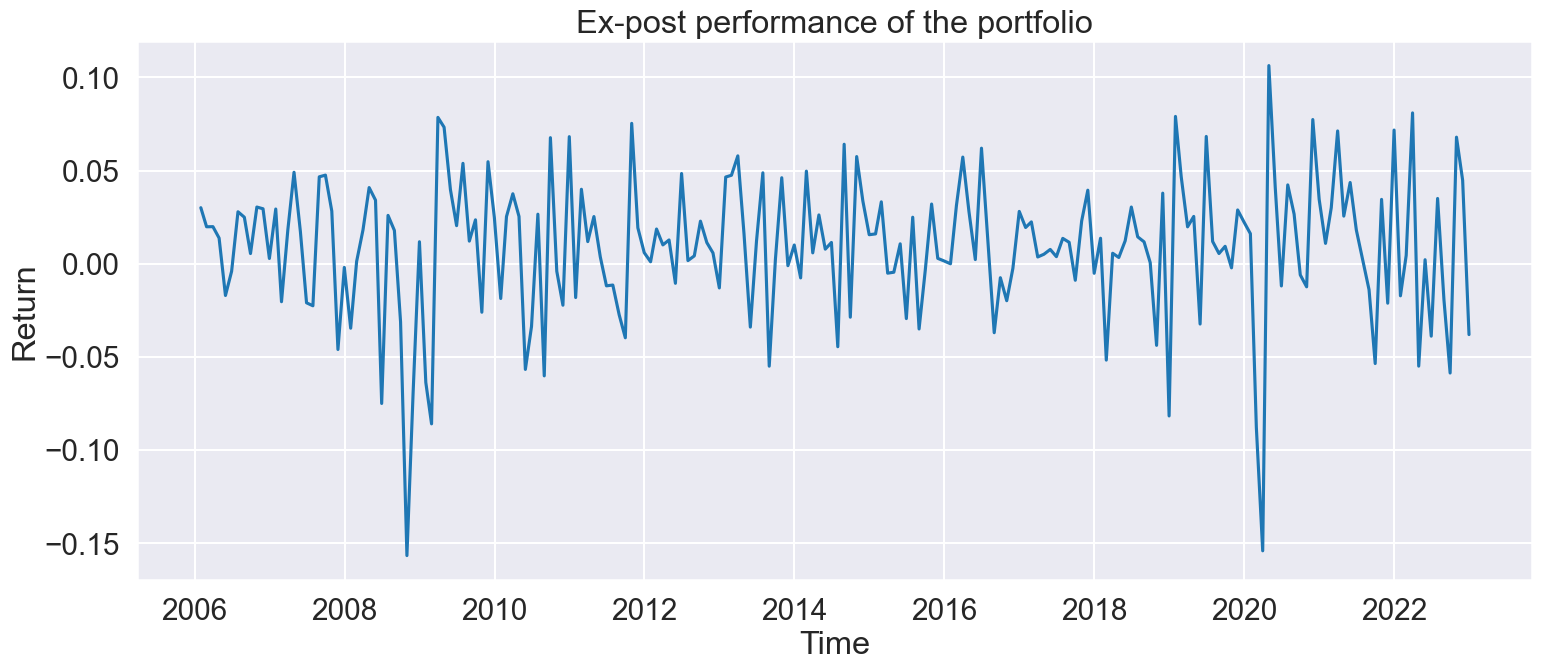

In [742]:
fig, ax = plt.subplots(figsize=(18,7))
ax.plot(performances.T)
ax.title.set_text('Ex-post performance of the portfolio')
ax.set_ylabel('Return')
ax.set_xlabel('Time')
plt.show()

### Compute the characteristics of this portfolio over the sample: annualized average return ($\bar{\mu}_{p}$), annualized volatility $(\sigma_{p})$, Sharpe ratio $(SR_{p})$, minimum, maximum, and maximum drawdown.

#### Annualized average return $\bar{\mu}_{p}$

$$
\bar{\mu}_{p}^{(y)} = 12\text{  x  }\text{} \bar{\mu}_{p}^{(m)}
$$

#### Annualized volatility $\sigma_{p}$
$$
\sigma_{p}^{(y)} = \sqrt{12}\text{  x  }\text{} \sigma_{p}^{(m)}
$$

#### Sharpe ratio $SR_{p}$

$$
SR_{p} = \frac{\bar{R}_{p} - R_{f}}{\sigma_{p}}
$$

$$
SR_{p}^{(y)} = \sqrt{12}\text{  x  }\text{} SR_{p}^{(m)}
$$

#### Minimum and maximum

In [539]:
minimum = np.min(performances)
maximum = np.max(performances)

print('=============================')
print('**** Minimum and maximum ****')
print('=============================')
print(f'Minimum: {minimum:.4f}')
print(f'Maximum: {maximum:.4f}')
print('=============================')

**** Minimum and maximum ****
Minimum: -0.1565
Maximum: 0.1063


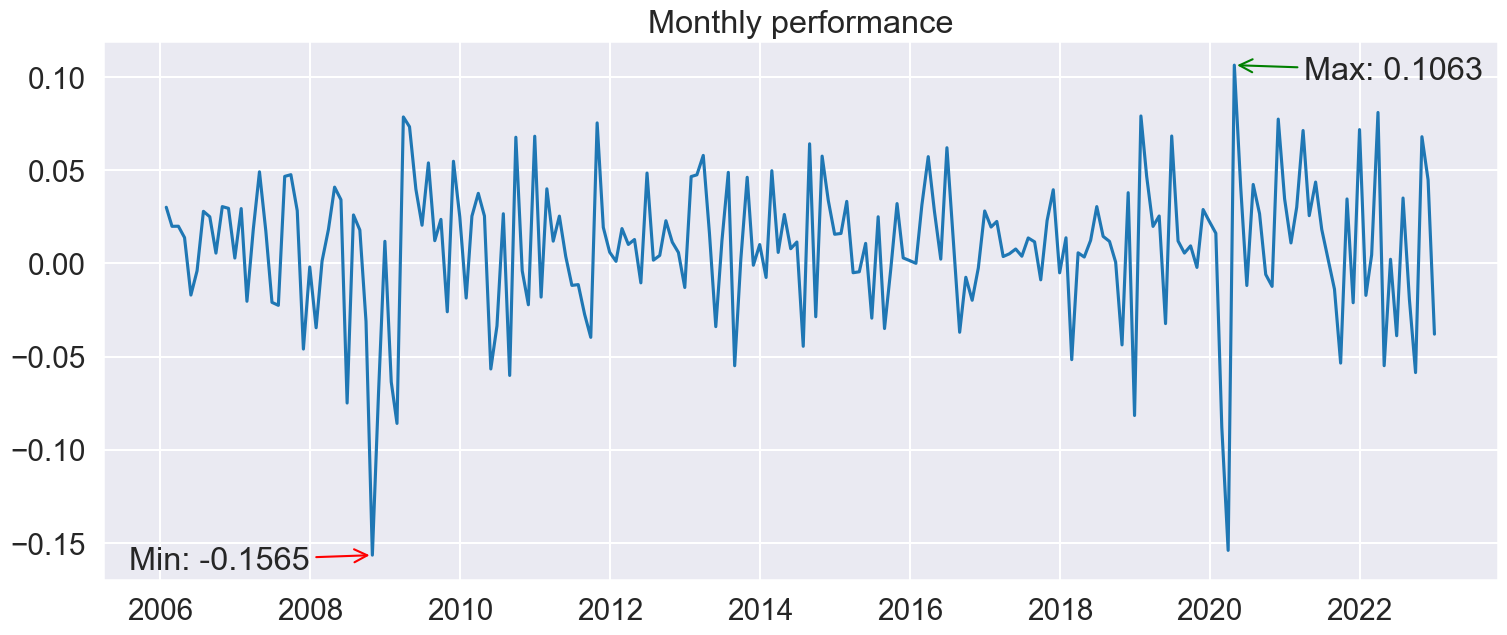

In [537]:
fig, ax = plt.subplots(figsize=(18,7))
ax.plot(performances.T)

## Maximum Value
max_index = performances.stack().idxmax()
max_value = performances.loc[max_index[0], max_index[1]]
ax.annotate(f'Max: {max_value:.4f}', xy=(max_index[1], max_value),
            xytext=(50, -10), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='green'))

## Minimum Value
min_index = performances.stack().idxmin()
min_value = performances.loc[min_index[0], min_index[1]]
ax.annotate(f'Min: {min_value:.4f}\Test', xy=(min_index[1], min_value),
            xytext=(-175, -10), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='red'))

ax.title.set_text('Monthly performance')
plt.show()

#### Maximum drawdown

$$
DD_{t} = \max_{1 \le j \le T} (p_{j} - p{t})
$$

$$
MDD = \max_{1 \le t \le T} DD_{t}
$$

#### 1.2 - Comparison with the benchmark, the value-weighted portfolio $P^{(vw)}$

$$
R_{t+1}^{(vw)} = \sum^{N}_{i=1}w_{i,t}R_{i,t+1}
$$

$$
w_{i,t} = \frac{Cap_{i,t}}{\sum^{N}_{j=1}Cap_{j,t}}
$$